### Bio-ClinicalBERT
From: https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT

1. Pre-processing
    - use spispaCy: https://allenai.github.io/scispacy/ for processing medical texts (can choose different preprocessing model) 

2. Training BERT or use Bio-clinicalBERT or use or sciBERT?
    - example: https://github.com/nwams/ClinicalBERT-Deep-Learning--Predicting-Hospital-Readmission-Using-Transformer/blob/master/ClinicalBERT%20Deep%20Learning%20-%20Predicting%20Hospital%20Readmission.ipynb
    
3. Visualization of word embeddings (with T-sne diagram) 
    - Source: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne/notebook
    - 3D: https://medium.com/cindicator/t-sne-and-word-embedding-weekend-of-a-data-scientist-5c99ddacbf51

4. Visualization of attention with bertViz
    - example: https://www.kaggle.com/vishakha10/score-visualization-of-clinical-bert


In [447]:
import torch
from transformers import AutoTokenizer, AutoModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import re

tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [472]:
def report_toString(report):
    reportString = ''.join(report)
    return reportString

def report_preprocessing(reportString):
    cleanedReport = re.sub(r'[^\w\s]','',reportString)   # remove punctuation (not word characters and whitespace)
    cleanedReport = re.sub('_', '', cleanedReport)        # remove __ in the report
    cleanedReport = re.sub(r'[\d-]', '', cleanedReport)  # remove numbers in the report 
    cleanedReport = re.sub('\n', '', cleanedReport)
    #cleanedReport = cleanedReport.lower()                # lowercasing
    
    return cleanedReport

# filepath = '/media/Data/ComputerVision/mimic_cxr_dicom/physionet.org/files/mimic-cxr/2.0.0/files/p10/p10167784/s51473202.txt'
# with open(filepath) as f:
#     report = f.readlines()

reportString = "year old woman with right complicated by pneumonia evaluate TECHNIQUE  Single frontal view of the chest COMPARISON  Chest radiograph   FINDINGS  Bilateral low lung No significant change in bilateral lower lobe. Upper lung is clear. Moderate pleural effusion bilateral stable. No pneumonia.  Cardiac size mildly enlarged likely exaggerate by low lung tube carina  tube terminate in the stomach  Right terminate in the upper right atrium and can pull back for standard positioning at the cavoatrial junction  IMPRESSION   tube above the carina  Right terminate in the right atrium and may pull back for standard sectioning of the junction.  Otherwise no interval change to compare NOTIFICATION   The finding was discussed with  MD by MD on the telephone  minutes after discovery of the findings"
#reportString = "heart, brain, kidney, liver, lung, nerve, gene, nucleic acid, cell, nucleus"
#reportString = report_toString(report)
reportPreprocessed = report_preprocessing(reportString)
print(reportPreprocessed)

year old woman with right complicated by pneumonia evaluate TECHNIQUE  Single frontal view of the chest COMPARISON  Chest radiograph   FINDINGS  Bilateral low lung No significant change in bilateral lower lobe Upper lung is clear Moderate pleural effusion bilateral stable No pneumonia  Cardiac size mildly enlarged likely exaggerate by low lung tube carina  tube terminate in the stomach  Right terminate in the upper right atrium and can pull back for standard positioning at the cavoatrial junction  IMPRESSION   tube above the carina  Right terminate in the right atrium and may pull back for standard sectioning of the junction  Otherwise no interval change to compare NOTIFICATION   The finding was discussed with  MD by MD on the telephone  minutes after discovery of the findings


In [473]:
marked_text = "[CLS] " + reportPreprocessed + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)
tokenized_text = [word for word in tokenized_text if word not in stop_words]    # Stopword removal!!!!  <---
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
print(tokenized_text)
print(len(tokenized_text))
print(indexed_tokens)

# Display the words with their indeces.
# for tup in zip(tokenized_text, indexed_tokens):
#     print('{:<12} {:>6,}'.format(tup[0], tup[1]))

# Mark each of the token as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

['[CLS]', 'year', 'old', 'woman', 'right', 'complicated', 'pneumonia', 'evaluate', 'technique', 'single', 'frontal', 'view', 'chest', 'comparison', 'chest', 'radio', '##graph', 'findings', 'bilateral', 'low', 'lung', 'significant', 'change', 'bilateral', 'lower', 'lobe', 'upper', 'lung', 'clear', 'moderate', 'p', '##le', '##ural', 'e', '##ff', '##usion', 'bilateral', 'stable', 'pneumonia', 'cardiac', 'size', 'mildly', 'enlarged', 'likely', 'ex', '##agger', '##ate', 'low', 'lung', 'tube', 'car', '##ina', 'tube', 'terminate', 'stomach', 'right', 'terminate', 'upper', 'right', '##rium', 'pull', 'back', 'standard', 'positioning', 'ca', '##vo', '##at', '##rial', 'junction', 'impression', 'tube', 'car', '##ina', 'right', 'terminate', 'right', '##rium', 'may', 'pull', 'back', 'standard', 'section', '##ing', 'junction', 'otherwise', 'interval', 'change', 'compare', '##ification', 'finding', 'discussed', '##d', '##d', 'telephone', 'minutes', 'discovery', 'findings', '[SEP]']
98
[101, 1214, 1385

In [474]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])
print(tokens_tensor)

tensor([[  101,  1214,  1385,  1590,  1268,  8277, 20673, 17459,  5531,  1423,
         22172,  2458,  2229,  7577,  2229,  2070, 15241,  9505, 20557,  1822,
         13093,  2418,  1849, 20557,  2211, 25163,  3105, 13093,  2330,  8828,
           185,  1513, 12602,   174,  3101, 17268, 20557,  6111, 20673, 17688,
          2060, 21461, 12089,  2620,  4252, 28100,  2193,  1822, 13093,  7159,
          1610,  2983,  7159, 22516,  3472,  1268, 22516,  3105,  1268, 11077,
          3373,  1171,  2530, 23208, 11019,  6005,  2980, 13119,  6698,  8351,
          7159,  1610,  2983,  1268, 22516,  1268, 11077,  1336,  3373,  1171,
          2530,  2237,  1158,  6698,  4303, 14235,  1849, 14133,  5783,  4006,
          6352,  1181,  1181,  7314,  1904,  6004,  9505,   102]])


In [475]:
# Load pre-trained model (weights)
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT", 
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                 )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [476]:
# Run the text through BioClinicalBERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

In [477]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 98
Number of hidden units: 768


In [478]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

# tokens, layers, features
token_embeddings.size()

torch.Size([98, 13, 768])

In [479]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 98 x 768


In [480]:
from sklearn.manifold import TSNE
import numpy 

labels = tokenized_text
tokens = []

for i in range(0, len(token_vecs_sum)-1, 1):
    tokens.append(token_vecs_sum[i])
    
#tokensArray = np.array(tokens)
tokensArray = [t.numpy() for t in tokens]

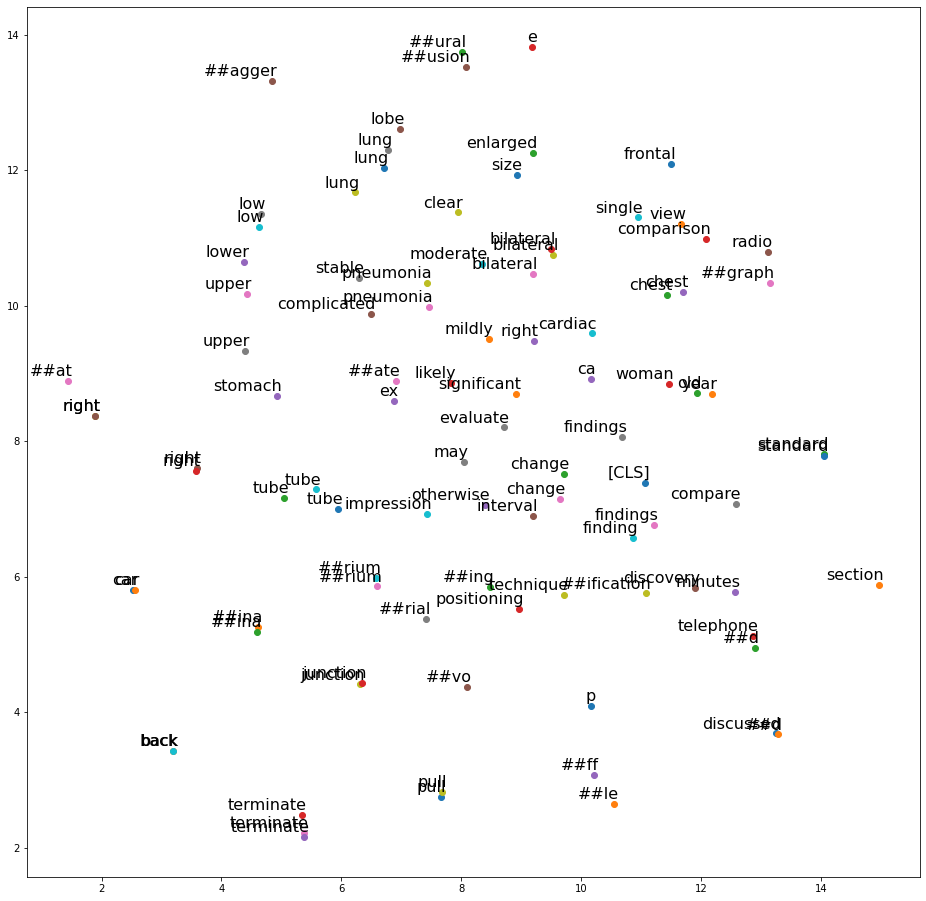

In [481]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokensArray)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom', 
                 fontsize=16)
    #plt.xlim([-400, 400])
    #plt.ylim([-400, 400])
plt.show()